## Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
data = pd.read_csv('loan data.csv')

## Getting some informations about the dataset

In [ ]:
data.shape

(614, 13)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Droping useless column (ID column)

In [ ]:
data.drop(columns='Loan_ID', inplace=True)

## The number of misssing values in each column

In [ ]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Deleting all the rows containing missing values

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.shape

(480, 12)

In [ ]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Understanding the correlation between various numerical features


<Axes: >

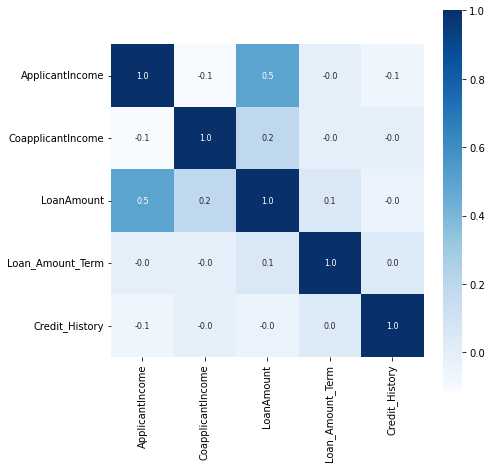

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,7))
correlation = data.corr()
sns.heatmap(correlation, square=True, annot=True, annot_kws={'size': 8}, fmt='.1f', cbar=True, cmap='Blues', )

## The number of unique values in each column (Whether if it's categorical or numerical)

In [ ]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## The number of categorical values in each categorical column

In [ ]:
for column in data.columns:
  if data[column].dtype == 'object':
    print(f"{column}: {data[column].nunique()}")

Gender: 2
Married: 2
Dependents: 4
Education: 2
Self_Employed: 2
Property_Area: 3
Loan_Status: 2


## The categorical values in each categorical column

In [ ]:
for column in data.columns:
  if data[column].dtype == 'object':
    print(f"{column}: {data[column].unique()}")

Gender: ['Male' 'Female']
Married: ['Yes' 'No']
Dependents: ['1' '0' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Rural' 'Urban' 'Semiurban']
Loan_Status: ['N' 'Y']


## Replacing a categorical value '3+' in the Dependents column by another value

In [ ]:
data['Dependents'].replace(to_replace='3+', value='4', inplace=True)

In [ ]:
for column in data.columns:
  if data[column].dtype == 'object':
    print(f"{column}: {data[column].unique()}")

Gender: ['Male' 'Female']
Married: ['Yes' 'No']
Dependents: ['1' '0' '2' '4']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Rural' 'Urban' 'Semiurban']
Loan_Status: ['N' 'Y']


## Encoding categorical data in the dataset

### Applying the label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [ ]:
for column in data.columns:
  if data[column].dtype == 'object':
    print(f"{column}: {data[column].dtype}")

Property_Area: object


### Applying the one hot encoding

In [ ]:
one_hot = pd.get_dummies(data['Property_Area'])
# Concatenating the data without the Property_Area column with the ecoded 
data = pd.concat([data.drop(columns='Property_Area'), one_hot], axis=1)

## Visualizing the impact of various features on the target variable

### Gender column impact

In [ ]:
data['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

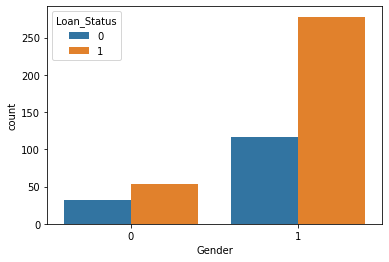

In [ ]:
sns.countplot(x='Gender', hue='Loan_Status', data=data)

### Married column impact

In [ ]:
data['Married'].value_counts()

1    311
0    169
Name: Married, dtype: int64

<Axes: xlabel='Married', ylabel='count'>

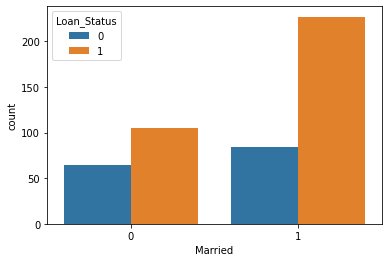

In [ ]:
sns.countplot(x='Married', hue='Loan_Status', data=data)

## The independent and the dependent variable

In [ ]:
X = data.drop(columns='Loan_Status').values
y = data['Loan_Status'].values

In [ ]:
print(X.shape)
print(y.shape)

(480, 13)
(480,)


## Spliting the dataset into the training set and the test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(432, 13)
(48, 13)
(432,)
(48,)


## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Models selection

## Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Applying k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier1, X=X_train, y=y_train, cv=10)
print(f"Average accuracy: {accuracies.mean()}")
print(f"Standard Deviation: {accuracies.std() * 100}%")

Average accuracy: 0.8008985200845664
Standard Deviation: 5.122328055363672%


In [ ]:
y_pred1 = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test.reshape(-1,1), y_pred1.reshape(-1,1))
score1 = accuracy_score(y_test.reshape(-1,1), y_pred1.reshape(-1,1))
print(cm1)
print(score1)

[[ 7  8]
 [ 1 32]]
0.8125


## K nearest neighbors (KNN) model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier()
classifier2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Applying k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier2, X=X_train, y=y_train, cv=10)
print(f"Average accuracy: {accuracies.mean()}")
print(f"Standard Deviation: {accuracies.std() * 100}%")

Average accuracy: 0.7707716701902749
Standard Deviation: 4.243633115562276%


In [ ]:
y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test.reshape(-1,1), y_pred2.reshape(-1,1))
score2 = accuracy_score(y_test.reshape(-1,1), y_pred2.reshape(-1,1))
print(cm2)
print(score2)

[[ 7  8]
 [ 3 30]]
0.7708333333333334


## Support vector machine (SVM) model

In [ ]:
from sklearn.svm import SVC
classifier3 = SVC(kernel='linear')
classifier3.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Applying k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier3, X=X_train, y=y_train, cv=10)
print(f"Average accuracy: {accuracies.mean()}")
print(f"Standard Deviation: {accuracies.std() * 100}%")

Average accuracy: 0.8055496828752642
Standard Deviation: 5.5209894497453345%


In [ ]:
y_pred3 = classifier3.predict(X_test)
cm3 = confusion_matrix(y_test.reshape(-1,1), y_pred3.reshape(-1,1))
score3 = accuracy_score(y_test.reshape(-1,1), y_pred3.reshape(-1,1))
print(cm3)
print(score3)

[[ 7  8]
 [ 0 33]]
0.8333333333333334


## Naive bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Applying k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier4, X=X_train, y=y_train, cv=10)
print(f"Average accuracy: {accuracies.mean()}")
print(f"Standard Deviation: {accuracies.std() * 100}%")

Average accuracy: 0.7894291754756871
Standard Deviation: 4.5378396315678415%


In [ ]:
y_pred4 = classifier3.predict(X_test)
cm4 = confusion_matrix(y_test.reshape(-1,1), y_pred4.reshape(-1,1))
score4 = accuracy_score(y_test.reshape(-1,1), y_pred4.reshape(-1,1))
print(cm4)
print(score4)

[[ 7  8]
 [ 0 33]]
0.8333333333333334


## Decision tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier()
classifier5.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Applying k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier5, X=X_train, y=y_train, cv=10)
print(f"Average accuracy: {accuracies.mean()}")
print(f"Standard Deviation: {accuracies.std() * 100}%")

Average accuracy: 0.7012684989429177
Standard Deviation: 6.8199761639100505%


In [ ]:
y_pred5 = classifier4.predict(X_test)
cm5 = confusion_matrix(y_test.reshape(-1,1), y_pred5.reshape(-1,1))
score5 = accuracy_score(y_test.reshape(-1,1), y_pred5.reshape(-1,1))
print(cm5)
print(score5)

[[ 7  8]
 [ 1 32]]
0.8125


## Random forest classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier()
classifier6.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Applying k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier6, X=X_train, y=y_train, cv=10)
print(f"Average accuracy: {accuracies.mean()}")
print(f"Standard Deviation: {accuracies.std() * 100}%")

Average accuracy: 0.7035940803382663
Standard Deviation: 6.918433044740335%


In [ ]:
y_pred6 = classifier6.predict(X_test)
cm6 = confusion_matrix(y_test.reshape(-1,1), y_pred6.reshape(-1,1))
score6 = accuracy_score(y_test.reshape(-1,1), y_pred6.reshape(-1,1))
print(cm6)
print(score6)

[[10  5]
 [ 7 26]]
0.75
